C:\Users\himanshi\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8774 - loss: 0.4314 - val_accuracy: 0.9604 - val_loss: 0.1360
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9636 - loss: 0.1252 - val_accuracy: 0.9668 - val_loss: 0.1073
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9769 - loss: 0.0787 - val_accuracy: 0.9760 - val_loss: 0.0779
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9825 - loss: 0.0582 - val_accuracy: 0.9771 - val_loss: 0.0799
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9873 - loss: 0.0431 - val_accuracy: 0.9783 - val_loss: 0.0744
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9886 - loss: 0.0353 - val_accuracy: 0.9783 - val_loss: 0.0729
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9923 - loss: 0.0263 - val_accuracy: 0.9769 - val_loss: 0.0787
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9938 - loss: 0.0202 - 

Enter an index number (0 to 9999):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


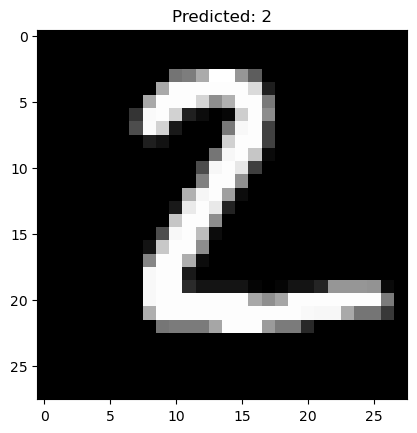

In [1]:
# Step 1: Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Step 2: Load and preprocess the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Step 3: Build the neural network model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Step 7: Take user input for an index and predict the corresponding digit
try:
    # Ask user for an index number
    index = int(input(f"Enter an index number (0 to {len(X_test) - 1}): "))

    # Ensure the index is within bounds
    if index < 0 or index >= len(X_test):
        print("Invalid index! Please enter a number within the test set range.")
    else:
        # Reshape the selected image and make a prediction
        sample_image = X_test[index].reshape(1, 28, 28)
        prediction = np.argmax(model.predict(sample_image), axis=-1)

        # Display the image and the predicted label
        plt.imshow(X_test[index], cmap='gray')
        plt.title(f"Predicted: {prediction[0]}")
        plt.show()

except ValueError:
    print("Invalid input! Please enter a valid number.")